## Plotting the first experiment

In [47]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

In [48]:
# reading all the file

# for openign error and acc
def open_file(filepath):
    f=open(filepath,'r')
    _list = list()
    for line in f:
        _list.append(float(line))
    return _list


In [69]:
def plot_graph(val_dict,x_axis_label,y_axis_label, title, scale=None):
    num_epochs = 100
    stats_interval = 5
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
#     plt.plot()
    for _label in val_dict:        
        if _label!="validation":
            #pdb.set_trace()
             ax_1.plot(val_dict[_label],label=_label)
        else:
#              pdb.set_trace()
             ax_1.plot(np.arange(1,120,stats_interval),val_dict[_label],label=_label)
#              pass
    ax_1.legend(loc=0)
    ax_1.set_xlabel(x_axis_label)
    ax_1.set_ylabel(y_axis_label)
    ax_1.set_title(title)
    plt.savefig(title+".png")
#       plt.legend(loc=0)
#     plt.xlabel(x_axis_label)
#     plt.ylabel(y_axis_label)
#     plt.title(title)


In [70]:
def plot_list_result(filelist,title):
    """
    can be acc_valid_train 
    
    """
    exp_dict = {}
    for filetup in filelist:
        filename,_title = filetup
        val_list  = open_file(filename)
        exp_dict[_title] = val_list
    plot_graph(exp_dict,"epoch","accuracy",title)

In [27]:
def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

In [55]:
def multi_plot_result(filelist,valid=False,_title=None):
    result_dict = {}
    fig_1 = plt.figure(figsize=(8, 4))
#     plt.axis([4,50,0,100])
    scale = 5
    if _title:
        print(_title)
        plt.title(_title)
    for filetup in filelist:
        filename,label=filetup
        filepath= filename+".txt"
        result_dict[filename]=open_file(filepath)
#         pdb.set_trace()
        if valid:
            plt.plot(np.arange(4,121,scale),result_dict[filename],label=label)
        else:
            plt.plot(result_dict[filename],label=label)
        lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(_title+".png",bbox_extra_artists=(lgd,), bbox_inches='tight')

## ONE CONVOLUTIONAL LAAYER

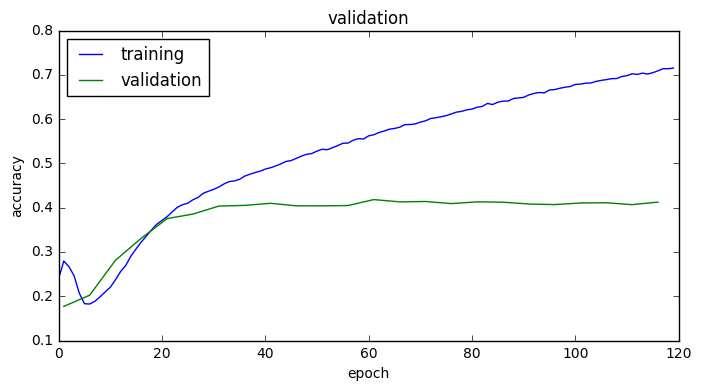

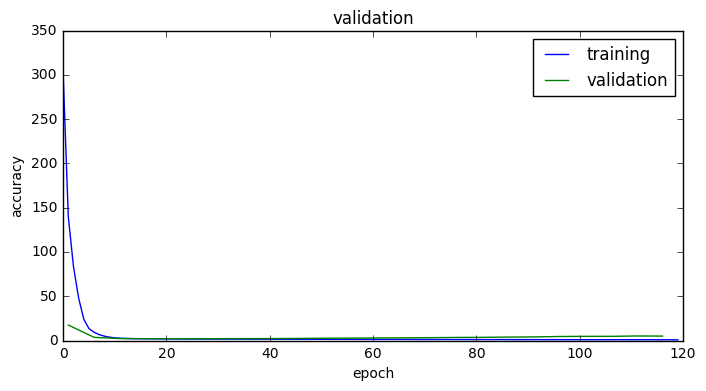

In [14]:
filelist = [("file_result/one_layer_cnn/acc_trains_model9.txt","training"),
            ("file_result/one_layer_cnn/acc_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"1 conv-net accuracy")
filelist = [("file_result/one_layer_cnn/error_trains_model9.txt","training"),
            ("file_result/one_layer_cnn/error_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"1 conv-net error")

After I change the output size of dense layer as the size of the input (shape[1]*shape[2]*shape[3])
it looks like the output of 

## Stanford
This stanford basically 4 layers Neural network with a dense relu layer behind.
the second trial of stanfrod NN we will remove the maxpool from the first and  third layer

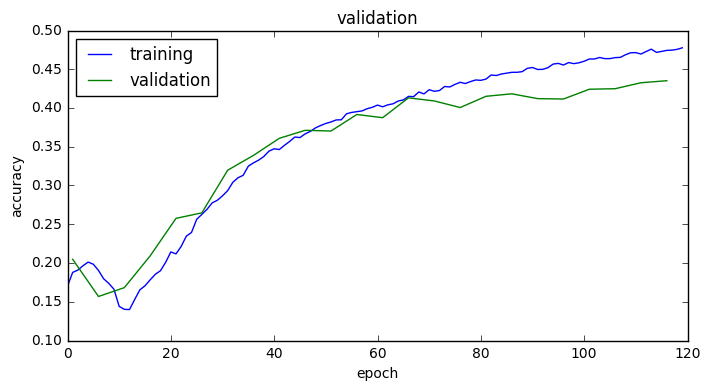

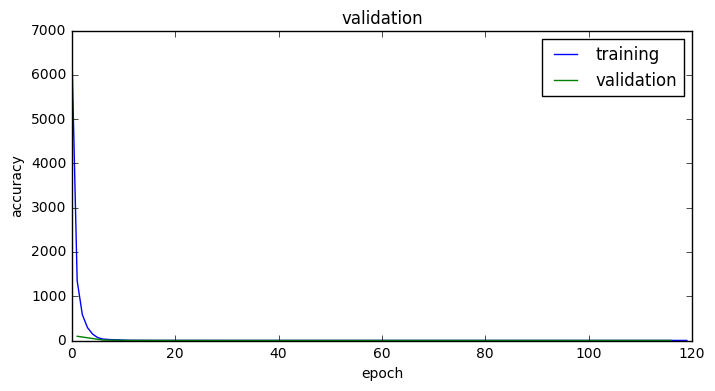

In [16]:
filelist = [("file_result/stanford/acc_trains_stanford.txt","training"),
            ("file_result/stanford/acc_valid_stanford.txt","validation")
           ]
plot_list_result(filelist,"1 conv-net accuracy")
filelist = [("file_result/stanford/error_trains_stanford.txt","training"),
            ("file_result/stanford/error_valid_stanford.txt","validation")
           ]
plot_list_result(filelist,"1 conv-net error")

Using two layer convolutional neural network

## USING MULTIPLE LAYER

Training Accuracy
Validation Accuracy
Training Error
Validation Error


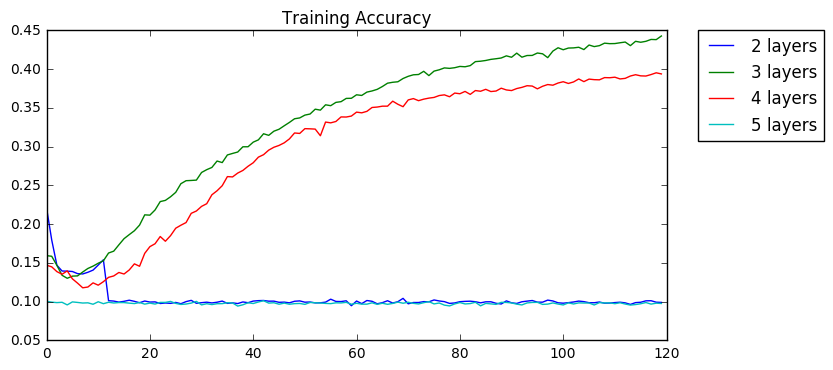

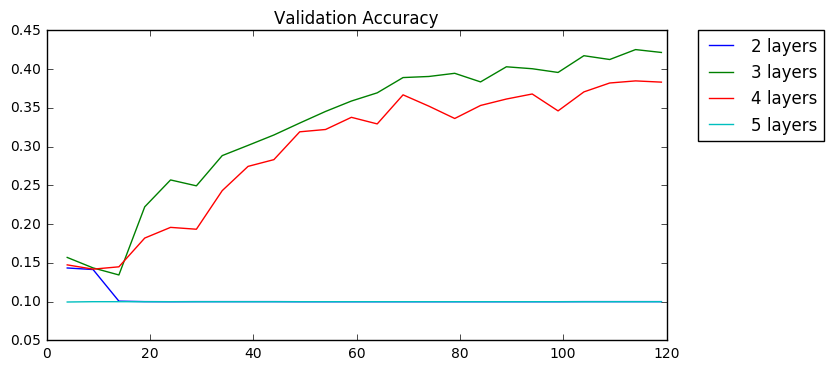

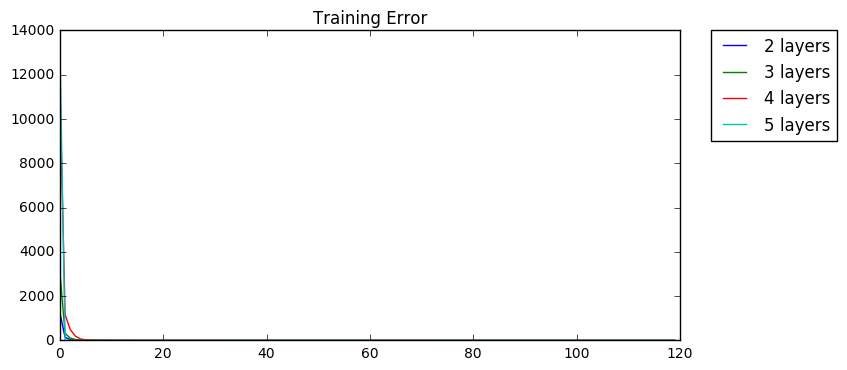

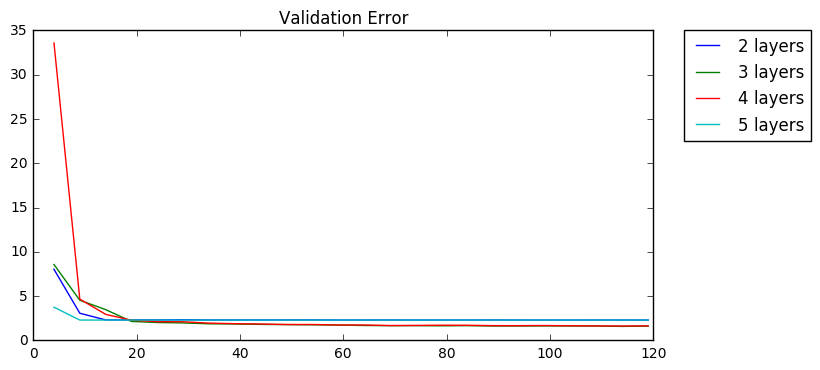

In [59]:

# experiment 2 part 3
filelist =  [("experiment_number_layer/res_2_layer_conv_acc_trains_model9","2 layers"),
    ("experiment_number_layer/res_2_layer_conv_acc_trains_model9","2 layers"),("experiment_number_layer/res_3_layer_conv_acc_trains_model9","3 layers"),("experiment_number_layer/res_4_layer_conv_acc_trains_model9","4 layers"),("experiment_number_layer/res_5_layer_conv_acc_trains_model9","5 layers")]
multi_plot_result(filelist, _title='Training Accuracy')

filelist =  [("experiment_number_layer/res_2_layer_convacc_valid_model9","2 layers"),("experiment_number_layer/res_3_layer_convacc_valid_model9","3 layers"),("experiment_number_layer/res_4_layer_convacc_valid_model9","4 layers"),("experiment_number_layer/res_5_layer_convacc_valid_model9","5 layers")]
multi_plot_result(filelist, _title='Validation Accuracy',valid=True)

filelist =  [("experiment_number_layer/res_2_layer_conv_error_trains_model9","2 layers"),("experiment_number_layer/res_3_layer_conv_error_trains_model9","3 layers"),("experiment_number_layer/res_4_layer_conv_error_trains_model9","4 layers"),("experiment_number_layer/res_5_layer_conv_error_trains_model9","5 layers")]
multi_plot_result(filelist, _title='Training Error')

filelist =  [("experiment_number_layer/res_2_layer_converror_valid_model9","2 layers"),("experiment_number_layer/res_3_layer_converror_valid_model9","3 layers"),("experiment_number_layer/res_4_layer_converror_valid_model9","4 layers"),("experiment_number_layer/res_5_layer_converror_valid_model9","5 layers")]
multi_plot_result(filelist, _title='Validation Error',valid=True)

# filelist =  [("acc_valid_model5","elu-tanh"),("acc_valid_model9","elu-tanh-relu"),("acc3_layer_small.valid","elu-tanh-relu (dropout)"),("acc2_layer_dropout.valid","elu-tanh (dropout)")]
# plot_result(filelist,valid=True,_title="Validation accuracy : experiment 3 - Dropout")

# filelist =  [("error_trains_model5","elu-tanh"),("error_trains_model9","elu-tanh-relu"),("acc.3_layer_small.train","elu-tanh-relu (dropout)"),("err.2_layer_dropout.train","elu-tanh (dropout)")]
# plot_result(filelist, _title='Training error : experiment 3 - Dropout')

# filelist =  [("error_valid_model5","elu-tanh"),("error_valid_model9","elu-tanh-relu"),("err.2_layer_dropout.valid","elu-tanh-relu (dropout)"),("err.3_layer_small.valid","elu-tanh (dropout)")]
# plot_result(filelist,valid=True,_title='Validation error : experiment 3 - Dropout')



## Putting dropout on 4x4 layer

# LE NET 
achitecture
<img src="lefuckigNet.png"  height="542" width="542">
<h3><center>Lenet</center></h3>

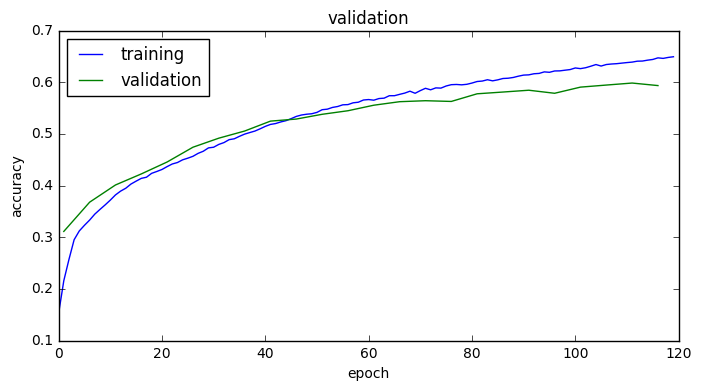

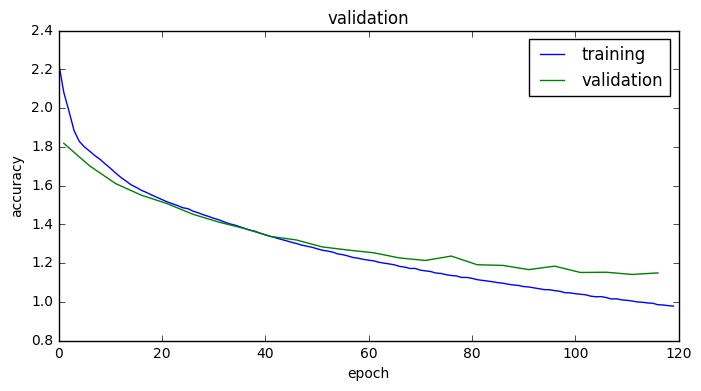

In [60]:
filelist = [("exp_lenet/lenet_acc_trains_stanford.txt","training"),
            ("exp_lenet/lenet_acc_valid_stanford.txt","validation")
           ]
plot_list_result(filelist,"lenet accuracy")

filelist = [("exp_lenet/lenet_error_trains_stanford.txt","training"),
            ("exp_lenet/lenet_error_valid_stanford.txt","validation")
           ]
plot_list_result(filelist,"lenet error")


## Experient with 4x4 layer

## Deleting max-pooling inspired by leNet
experiment exp-red-max


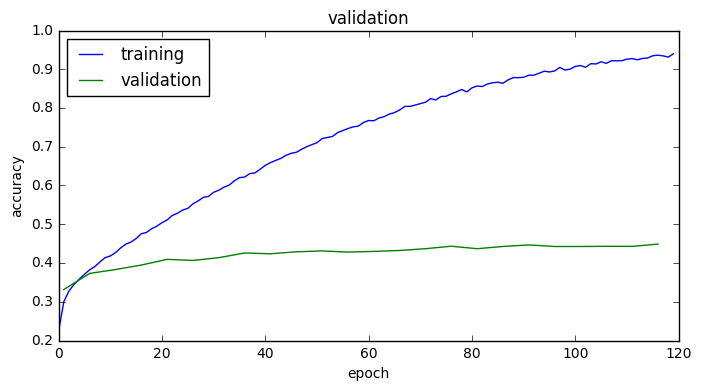

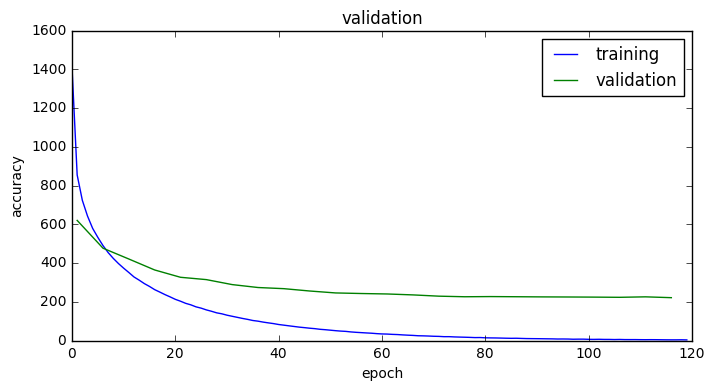

In [30]:
filelist = [("exp-L-Jaku/exp-red-max/res_delete_max_pool_4_layer_conv_acc_trains_model9.txt","training"),
            ("exp-L-Jaku/exp-red-max/res_delete_max_pool_4_layer_convacc_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"lenet accuracy")

filelist = [("exp-L-Jaku/exp-red-max/res_delete_max_pool_4_layer_conv_error_trains_model9.txt","training"),
            ("exp-L-Jaku/exp-red-max/res_delete_max_pool_4_layer_converror_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"lenet error")


## Add droput at the end of maxpooling


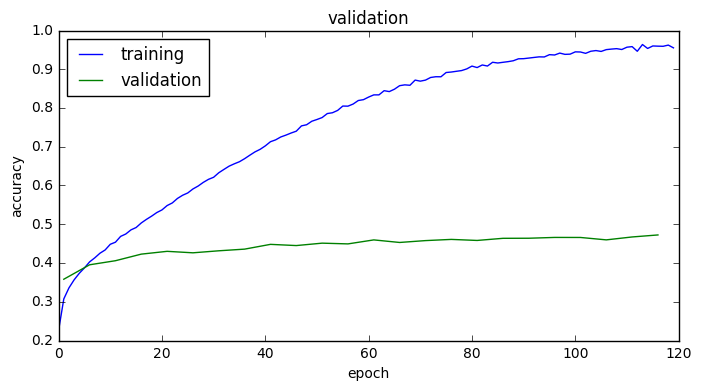

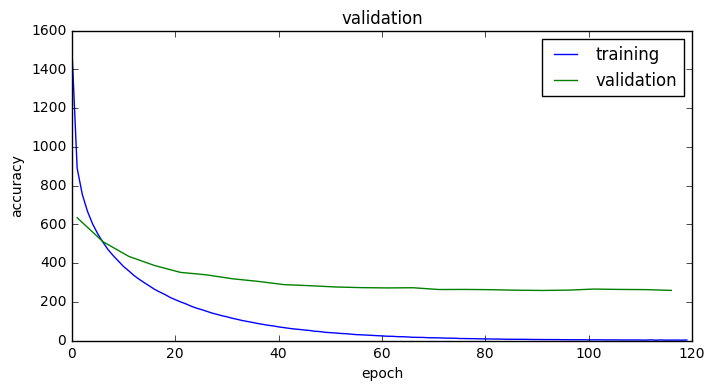

In [31]:
filelist = [("exp-L-Jaku/exp-L2-drop/res_delete_max_pool_4_layer_conv_acc_trains_model9.txt","training"),
            ("exp-L-Jaku/exp-L2-drop/res_delete_max_pool_4_layer_convacc_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"lenet accuracy")

filelist = [("exp-L-Jaku/exp-L2-drop/res_delete_max_pool_4_layer_conv_error_trains_model9.txt","training"),
            ("exp-L-Jaku/exp-L2-drop/res_delete_max_pool_4_layer_converror_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"lenet error")


# Add droput at the end of maxpooling and add L2 Norm 1.5

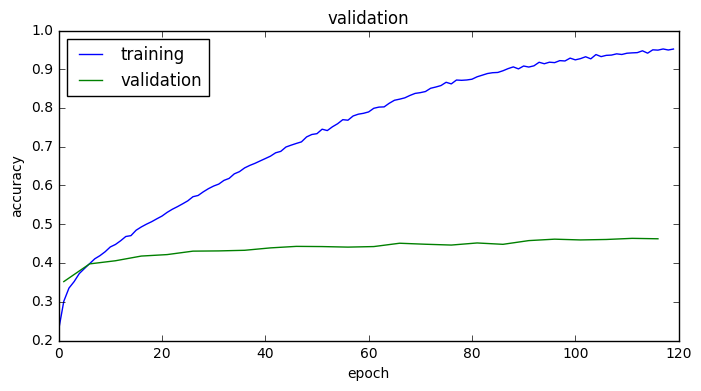

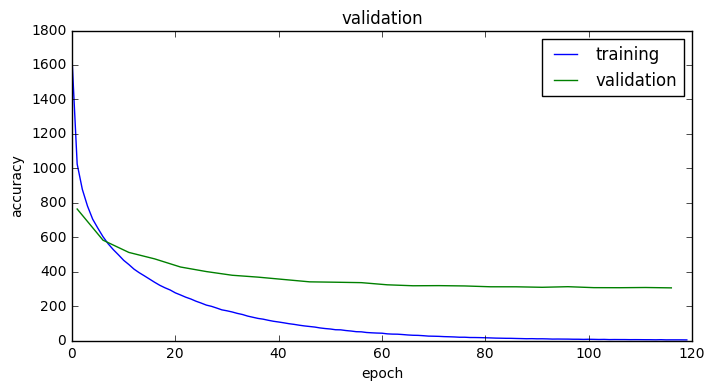

In [33]:
filelist = [("exp-L-Jaku/exp-L2-drop-enc/res_delete_max_pool_4_layer_conv_acc_trains_model9.txt","training"),
            ("exp-L-Jaku/exp-L2-drop-enc/res_delete_max_pool_4_layer_convacc_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"lenet accuracy")

filelist = [("exp-L-Jaku/exp-L2-drop-enc/res_delete_max_pool_4_layer_conv_error_trains_model9.txt","training"),
            ("exp-L-Jaku/exp-L2-drop-enc/res_delete_max_pool_4_layer_converror_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"lenet error")


# IMAGENET
Image net architecture can be seen below


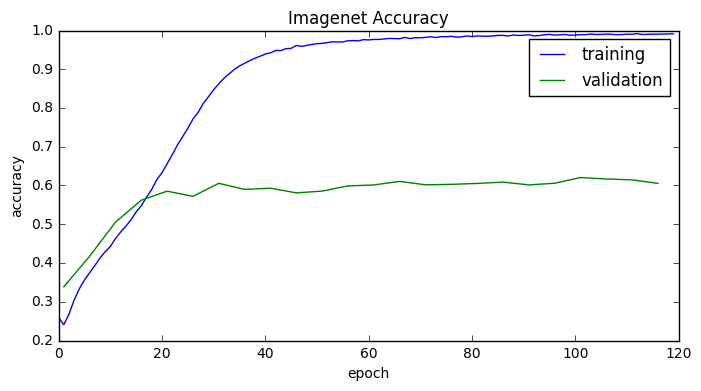

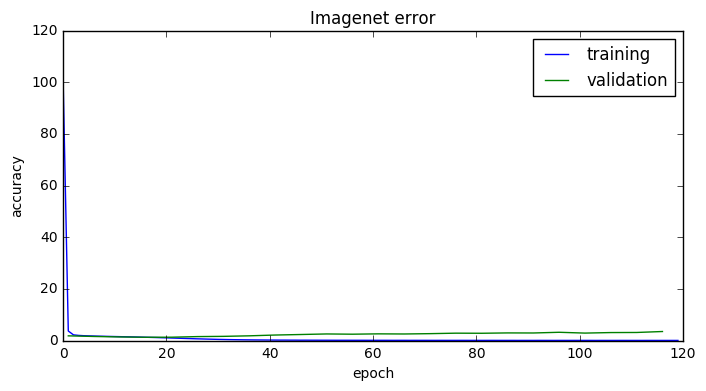

In [71]:
filelist = [("imagenet/res_delete_max_pool_4_layer_conv_acc_trains_model9.txt","training"),
            ("imagenet/res_delete_max_pool_4_layer_convacc_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"Imagenet Accuracy")

filelist = [("imagenet/res_delete_max_pool_4_layer_conv_error_trains_model9.txt","training"),
            ("imagenet/res_delete_max_pool_4_layer_converror_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"Imagenet error")


# Introduce Leaky realy

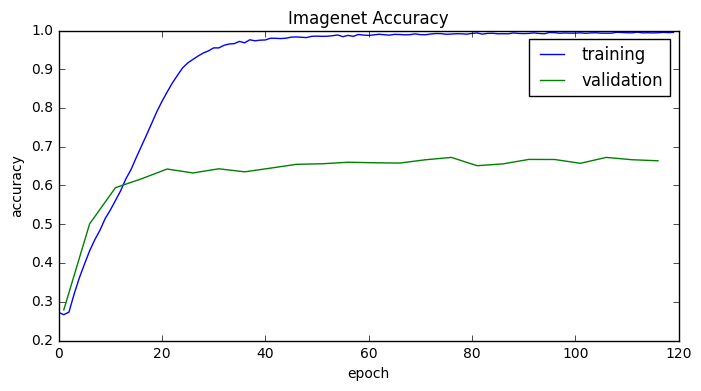

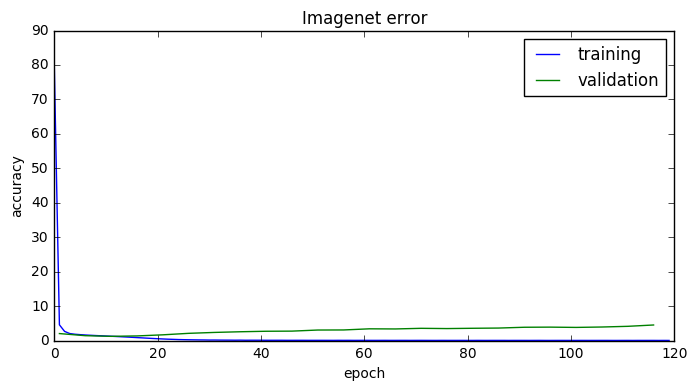

In [74]:
filelist = [("imagene_leaky/res_imagenet_leaky_acc_trains_model9.txt","training"),
            ("imagene_leaky/res_imagenet_leakyacc_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"Imagenet Accuracy")

filelist = [("imagene_leaky/res_imagenet_leaky_error_trains_model9.txt","training"),
            ("imagene_leaky/res_imagenet_leakyerror_valid_model9.txt","validation")
           ]
plot_list_result(filelist,"Imagenet error")


# Network in Network

# PLOTTING OUTPUT AND WEIGHT

In [ ]:
filelist =  [("experiment_number_layer/res_2_layer_conv_acc_trains_model9","2 layers"),("experiment_number_layer/res_3_layer_conv_acc_trains_model9","3 layers"),("experiment_number_layer/res_4_layer_conv_acc_trains_model9","4 layers"),("experiment_number_layer/res_5_layer_conv_acc_trains_model9","5 layers")]
multi_plot_result(filelist, _title='Training Accuracy')


In [1]:
def open_file_res(filepath):
    f=open(filepath,'r')
    _list = list()
    for line in f:
        pdb.set_trace()
        _res = [float(i) for i in line]
        _list.append(_res)
    return _list

In [1]:
def plotNNFilter_dist(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6 
    n_rows = math.ceil(filters / n_columns) + 1 
    for i in range(3):
#         plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        # plt.plot(units[0,:,:,i])
        # plt.savefig("hahaha.png")
        # plt.imshow(units[0,:,:,i],interpolation="nearest", cmap="gray")
        # plt.savefig("plot_"+str(i)+".png") #, interpolation="nearest", cmap="gray")
        # plt.clf()
        plt.hist(units[0,:,:,i])
        plt.savefig("hist_"+str(i)+".png") #, interpolation="nearest", cmap="gray")
        plt.clf()

In [2]:
def plotNNFilter_img(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6 
    n_rows = math.ceil(filters / n_columns) + 1 
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        # plt.plot(units[0,:,:,i])
        # plt.savefig("hahaha.png")
#         pdb.set_trace()
        plt.imshow(units[0,:,:,i],interpolation="nearest", cmap="gray")
#     plt.show()
        # plt.savefig("plot_"+str(i)+".png") #, interpolation="nearest", cmap="gray")
        # plt.clf()
#         plt.hist(units[0,:,:,i])
    plt.savefig("dist_"+".png") #, interpolation="nearest", cmap="gray")


In [3]:
filelist = "conv-1_conv14"
# arr_list = open_file_res(filelist)

In [4]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
import pdb
%matplotlib inline
import cPickle
import math
obj = cPickle.load(open('conv-5_relu.p', 'rb'))
plotNNFilter_dist(obj)
# obj.shape